## Canadian Fire Data & Predictive Risk Modeling
### Exporatory Data Analysis

Original File Received from Canadian Association of Fire Chiefs is cafc_nfid_incident_new.xlsx. In Excel format it can take over 30 minutes to load the 300mb of data. In response to that, the dataset has been reformated to a CSV file and called **cafc_nfid_csv.csv**

D:\StClair\Capstone\CanadaFireData\Files\cafc_nfid_csv.csv



In [163]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display Setting to show all the columns
pd.set_option('display.max_columns', None)

In [164]:
# Read in the CSV cafc_nfid_csv.csv file to a Pandas DF called firedata
# - this will still take several minutes to load as is it's >= 250mb. Ignore mixed type error.

firedata = pd.read_csv('D:\StClair\Capstone\CanadaFireData\Files\cafc_nfid_csv.csv') 


C:\Users\kenhu\Anaconda3\envs\DAB300F20\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8,24,26,52,81,82,84,89,113) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [165]:
firedata.head()

,LINK_ID,INCDNTID,JURIS,YEAR,MONTH,DATE,DAY,TIME,INCIDLOC,RESPONSE,MUTLAID,CREWSIZE,RESPSUB,SUBSSIZE,NUMBENG,NUMBAER,NUMBTANK,NUMBCFR,DISTANCE,STATARR,NUMBRESC,NUMDEATH,NUMBINJ,NUMBCAS,MAJOCC,MAJOCGRP,PROPCLAS,PROPGRP,PROPSUBG,PROPOWN,ILLUSE,GENCONST,METHCONS,YEARCONS,HEIGHT,FLRAREA,NUMBOCC,RISKVALA,RISKVALB,RISKVALC,MANPROT,SPRINPRO,FIXEDSYS,AUTODET,FIREDET,OUTPROT,WATER,SERVICE,IGNIOBJ,IGNOBGRP,FUELERGY,ENERGY,MATERIAL,MATERGRP,ACTOROM,ACTOMGRP,ORIGIN,ORIGGRP,LEVELOR,FLAMEINT,FLAMEVER,FLAMEHOR,SMOKSPRD,FIREEXT,DAMEXT,DOLLOSSA,DOLLOSSB,DOLLOSSC,DETECT,TRANSALM,ACTION,PERFORM,CONTMETH,METHDGRP,SADPERF,IMPACT,OCCPNTSA,OCCPNTSB,OCCPNTSC,OCCPNTSD,CSD,CSD_name,csdtype,cmaca,CMA_name,sactyp,ct,fedres,da,postcd,PSDDWELL_CMA6,PSDDWELL_CMA11,PSDDWELL_CSD6,PSDDWELL_CSD11,ELDERPOP_CMA,ELDERPOP_CSD,YOUNGPOP_CMA,YOUNGPOP_CSD,LONEPAR_CMA6,LONEPAR_CMA11,LONEPAR_CSD6,LONEPAR_CSD11,AVNUMPER_CMA6,AVNUMPER_CMA11,AVNUMPER_CSD6,AVNUMPER_CSD11,MOVERS1_CMA6,MOVERS1_CMA11,MOVERS5_CMA6,MOVERS5_CMA11,MEDINC_CMA6,MEDINC_CMA11,MEDINC_CSD6,MEDINC_CSD11,EMPLOY_CMA6,EMPLOY_CMA11,EMPLOY_CSD6,EMPLOY_CSD11,UNEMPLOY_CMA6,UNEMPLOY_CMA11,UNEMPLOY_CSD6,UNEMPLOY_CSD11,LOWEDUC_CMA6,LOWEDUC_CMA11,LOWEDUC_CSD6,LOWEDUC_CSD11,CRIMRATE_CMA,CRIMRATE_CSD,PROPCRIM_CMA,PROPCRIM_CSD,VIOLCRIM_CMA,VIOLCRIM_CSD,UCRCSI_CMA,UCRCSI_CSD,respcode,CSD_flag
0,1,100399,13,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,.,0,.,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,550,5000,NaN,NaN,170,1000,780,7000,210,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,134676,13,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,.,0,.,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,510,5000,NaN,NaN,90,1000,100,1000,760,7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,229230,13,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,.,0,.,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,690,6000,NaN,NaN,990,9000,410,4000,620,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,720341,13,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,.,0,.,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,860,8000,0,0,990,9000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1240213,13,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,.,0,.,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,160,1000,NaN,NaN,990,9000,390,3000,310,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [166]:
firedata.dtypes

LINK_ID           int64
INCDNTID          int64
JURIS             int64
YEAR              int64
MONTH           float64
                 ...   
VIOLCRIM_CSD    float64
UCRCSI_CMA      float64
UCRCSI_CSD      float64
respcode        float64
CSD_flag        float64
Length: 136, dtype: object

In [167]:
firedata.head()
print('The shape of the original dataset is ', firedata.shape)

The shape of the original dataset is  (467929, 136)


The dataset contains 467,929 rows (which are individual fires) and 136 columns which are attributes of the fire. There are many empty rows, so we will only keep rows that are NOT missing the Incident Location (INCIDLOC) since that is our most basic piece of info and considered a Primary Key of the database --- we need to know the location each fire was in.

We will also filter the dataset by only keeping records of fires that occured in Ontario. According to the data dictionary, Ontario is JURIS code 35.

In [168]:
firedata = firedata[firedata['INCIDLOC'].notna()]
firedata = firedata.query('JURIS == 35')   # Don't use ' ' because JURIS is an Integer.

In [83]:
print('By dropping rows that had blank Indicent Locations, and filtering for only Ontario fires, our data shape is now', firedata.shape)
print('The oldest fire by date is', firedata.YEAR.min())
print('The most recent fire by year is', firedata.YEAR.max())

By dropping rows that had blank Indicent Locations, and filtering for only Ontario fires, our data shape is now (229747, 136)
The oldest fire by date is 2005
The most recent fire by year is 2014


In [169]:
firedata.head()

,LINK_ID,INCDNTID,JURIS,YEAR,MONTH,DATE,DAY,TIME,INCIDLOC,RESPONSE,MUTLAID,CREWSIZE,RESPSUB,SUBSSIZE,NUMBENG,NUMBAER,NUMBTANK,NUMBCFR,DISTANCE,STATARR,NUMBRESC,NUMDEATH,NUMBINJ,NUMBCAS,MAJOCC,MAJOCGRP,PROPCLAS,PROPGRP,PROPSUBG,PROPOWN,ILLUSE,GENCONST,METHCONS,YEARCONS,HEIGHT,FLRAREA,NUMBOCC,RISKVALA,RISKVALB,RISKVALC,MANPROT,SPRINPRO,FIXEDSYS,AUTODET,FIREDET,OUTPROT,WATER,SERVICE,IGNIOBJ,IGNOBGRP,FUELERGY,ENERGY,MATERIAL,MATERGRP,ACTOROM,ACTOMGRP,ORIGIN,ORIGGRP,LEVELOR,FLAMEINT,FLAMEVER,FLAMEHOR,SMOKSPRD,FIREEXT,DAMEXT,DOLLOSSA,DOLLOSSB,DOLLOSSC,DETECT,TRANSALM,ACTION,PERFORM,CONTMETH,METHDGRP,SADPERF,IMPACT,OCCPNTSA,OCCPNTSB,OCCPNTSC,OCCPNTSD,CSD,CSD_name,csdtype,cmaca,CMA_name,sactyp,ct,fedres,da,postcd,PSDDWELL_CMA6,PSDDWELL_CMA11,PSDDWELL_CSD6,PSDDWELL_CSD11,ELDERPOP_CMA,ELDERPOP_CSD,YOUNGPOP_CMA,YOUNGPOP_CSD,LONEPAR_CMA6,LONEPAR_CMA11,LONEPAR_CSD6,LONEPAR_CSD11,AVNUMPER_CMA6,AVNUMPER_CMA11,AVNUMPER_CSD6,AVNUMPER_CSD11,MOVERS1_CMA6,MOVERS1_CMA11,MOVERS5_CMA6,MOVERS5_CMA11,MEDINC_CMA6,MEDINC_CMA11,MEDINC_CSD6,MEDINC_CSD11,EMPLOY_CMA6,EMPLOY_CMA11,EMPLOY_CSD6,EMPLOY_CSD11,UNEMPLOY_CMA6,UNEMPLOY_CMA11,UNEMPLOY_CSD6,UNEMPLOY_CSD11,LOWEDUC_CMA6,LOWEDUC_CMA11,LOWEDUC_CSD6,LOWEDUC_CSD11,CRIMRATE_CMA,CRIMRATE_CSD,PROPCRIM_CMA,PROPCRIM_CSD,VIOLCRIM_CMA,VIOLCRIM_CSD,UCRCSI_CMA,UCRCSI_CSD,respcode,CSD_flag
19602,19603,7195,35,2005,1.0,1.0,NaN,NaN,Mississauga,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,95,0,3290,3000,3200,0.0,9.0,NaN,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,220,2000,0.0,NaN,0,0,390,3000,99,0,0.0,NaN,NaN,NaN,NaN,3.0,NaN,100000.0,50000.0,150000.0,0.0,0.0,NaN,0.0,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,3521005.0,Mississauga,CY,535.0,Toronto,1.0,501.01,61.0,35210417.0,L5J4B2,41.726579,41.238733,40.892064,39.052775,11.4,9.2,7.0,7.3,20.761778,22.515294,17.361208,9.908988,2.8,2.8,3.1,3.0,14.069997,11.757386,44.879701,39.630102,55313.0,70365.0,67728.0,49466.0,63.7,61.2,66.3,62.3,6.7,8.6,6.5,8.7,19.733944,16.958343,18.277753,15.203448,4414.7,3404.4,2908.6,2338.7,1049.9,650.3,71.97,54.31,35041.0,2.0
19603,19604,7197,35,2005,1.0,3.0,NaN,NaN,Winchester; North Dundas,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,95,0,3750,3000,3700,0.0,9.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0,0,88.0,NaN,0,0,0,0,140,1000,0.0,NaN,NaN,NaN,NaN,14.0,NaN,3000.0,1000.0,4000.0,0.0,0.0,NaN,0.0,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,3501030.0,North Dundas,TP,NaN,NaN,4.0,9935.00,102.0,35010339.0,K0C2K0,NaN,NaN,85.868263,84.954751,NaN,12.9,NaN,5.9,NaN,NaN,15.330520,7.013575,NaN,NaN,2.6,2.5,NaN,NaN,NaN,NaN,NaN,NaN,57823.0,41788.0,NaN,NaN,66.7,65.6,NaN,NaN,4.1,6.1,NaN,NaN,25.688589,22.756757,NaN,3013.0,NaN,1964.7,NaN,682.9,NaN,45.51,35089.0,2.0
19604,19605,7198,35,2005,1.0,4.0,NaN,NaN,Toronto,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,2.0,0.0,2.0,95,0,3110,3000,3100,0.0,9.0,NaN,NaN,NaN,2.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,990,9000,0.0,NaN,480,4000,390,3000,310,2000,0.0,NaN,NaN,NaN,NaN,0.0,NaN,75000.0,25000.0,100000.0,0.0,0.0,NaN,0.0,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,3520005.0,Toronto,C,535.0,Toronto,1.0,376.12,93.0,35200161.0,M1W1Y2,41.726579,41.238733,27.251795,26.225933,11.4,13.5,7.0,6.4,20.761778,22.515294,26.785498,10.540379,2.8,2.8,2.5,2.5,14.069997,11.757386,44.879701,39.630102,55313.0,70365.0,56980.0,42232.0,63.7,61.2,60.2,58.3,6.7,8.6,7.6,9.3,19.733944,16.958343,20.359429,17.508951,4414.7,5407.5,2908.6,3442.6,1049.9,1419.7,71.97,90.17,35304.0,0.0
19605,19606,7201,35,2005,1.0,8.0,NaN,NaN,Toronto; Ontario,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,95,0,3140,3000,3100,0.0,9.0,NaN,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,990,9000,0.0,NaN,0,0,0,0,140,1000,0.0,NaN,NaN,NaN,NaN,14.0,NaN,75000.0,50000.0,125000.0,0.0,0.0,NaN,0.0,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,3520005.0,Toronto,C,535.0,Toronto,1.0,83.00,109.0,35204496.0,M4J3P1,41.726579,41.238733,27.251795,26.225933,11.4,13.5,7.0,6.4,20.761778,22.515294,26.785498,10.540379,2.8,2.8,2.5,2.5,1

### Cleaning Up Problematic Postal Codes


Below we see a lot of dirty postal code problems that need cleaned
For Example, problem values such as: A1A1A1, ------  ,   [L6W3H   X1X1X1 000000  ......

In [84]:
firedata['postcd'].value_counts()

A1A1A1    4486
X1X1X1    3128
000000    2864
N0B2H1     278
N0H2T0     256
          ... 
L3P3B5       1
L8L1P9       1
K1M1S1       1
K7H3E2       1
M1P1J3       1
Name: postcd, Length: 69628, dtype: int64

In [10]:
# First use the REGEX from Marketing to remove all non alphanumberic symbols
# Then remove any whitespace
# The remove any entries that are not alphanumeric (like ***** or ......)
# Disregard the error warning

In [170]:
firedata['postcd'] = firedata['postcd'].str.replace(r"[^a-zA-Z\d\_]+", "")
firedata['postcd'] = firedata['postcd'].str.strip()


C:\Users\kenhu\Anaconda3\envs\DAB300F20\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [171]:
# We also know from this source (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_P) 
# that post codes in Ontario only begin with the letters K, L, M, N, & P
# This Regex Statement says that with ^starting with in postcd, only return KLMNP's

firedata = firedata[firedata['postcd'].str.contains(("^[KLMNP]+"), na=False)]

# Code Source: https://stackoverflow.com/questions/40249152/python-3-pandas-select-dataframe-using-startswith-or

In [172]:
firedata['postcd'].value_counts()

N0B2H1    278
N0H2T0    256
K0E1T1    230
L0R2A0    228
K0K1H0    222
         ... 
P1B2A1      1
L4L8N6      1
M4R2C1      1
L2A5L6      1
M1P1J3      1
Name: postcd, Length: 69480, dtype: int64

In [14]:
# With the Post Codes Cleaned we can move to Feature Engineering.

### Feature Engineering 1

We will use on the first 3 values in 'postcd.' That is called the Forward Sortation Area (FSA) and is a geographic area. For example Windsor has places like N8Y and N8X. This new column called 'postfsa' will only contain the first 3 left characters.

In [173]:
firedata['postfsa'] = firedata['postcd'].str[:3]

# There are also some postfsa's that are now less than 3. These were coded wrong by the Fire Department.
# We don't want those either

firedata = firedata[~(firedata.postfsa.str.len() < 3)]

In [174]:
firedata['postfsa'].value_counts()
# postfsa is now ready for further analysis.

K0K    1860
L8L    1206
P0M    1173
K0M    1159
K0L    1124
       ... 
M9S       1
N6W       1
LCM       1
L2L       1
LC6       1
Name: postfsa, Length: 610, dtype: int64

### Feature Engineering 2

For a time series analysis, we wil have problems with this dataset because the dates of each fire are listed in 3 seperate columns (Year, Month, Day). To fix this, a new column will be created that concatenates the 3 and makes them a datetime datatype.

In [175]:
# Code to make a Date field for TimeSeries.

# First, we also have a problem with decimal places in the Month and Date. When I made a string date, it looked like this: 
# 2005-10.0-25.0 so convert Month and Date to INT to get rid of the decimals

firedata['MONTH'] = firedata['MONTH'].astype(int)
firedata['DATE'] = firedata['DATE'].astype(int)

# All 3 columns are now INT. To avoid an error, convert them all to string and concatenate together into one new col 'FullDate'
 
firedata['FullDate'] = firedata['YEAR'].astype(str) + '-' + firedata['MONTH'].astype(str) + '-' + firedata['DATE'].astype(str)

In [176]:
firedata['FullDate']
# Looks good.

19602       2005-1-1
19603       2005-1-3
19604       2005-1-4
19605       2005-1-8
19606      2005-2-12
             ...    
255550    2014-12-31
255553      2014-4-8
255554     2014-4-10
255555     2014-4-10
255556     2014-6-28
Name: FullDate, Length: 154625, dtype: object

### Feature Engineering 3

We are also interested in evaluating the fires to see if the time of year, or season, has any impact on the rate of fires in a given area. To do this we created a new column called 'Season' based on the month of the year.

In [177]:
# create a list of our conditions
conditions = [
    (firedata['MONTH'] == 1),
    (firedata['MONTH'] == 2),
    (firedata['MONTH'] == 12),
    (firedata['MONTH'] == 3),
    (firedata['MONTH'] == 4),
    (firedata['MONTH'] == 5),
    (firedata['MONTH'] == 6),
    (firedata['MONTH'] == 7),
    (firedata['MONTH'] == 8),
    (firedata['MONTH'] == 9),
    (firedata['MONTH'] == 10),
    (firedata['MONTH'] == 11)
    ]

# create a list of the values we want to assign for each condition
values = ['Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Fall', 'Fall', 'Fall']

# create a new column and use np.select to assign values to it using our lists as arguments
firedata['Season'] = np.select(conditions, values)



In [178]:
# display updated DataFrame to see the new columns that we just engineered.
firedata[['FullDate','Season','postfsa']]


,FullDate,Season,postfsa
19602,2005-1-1,Winter,L5J
19603,2005-1-3,Winter,K0C
19604,2005-1-4,Winter,M1W
19605,2005-1-8,Winter,M4J
19606,2005-2-12,Winter,K0L
...,...,...,...
255550,2014-12-31,Winter,M6J
255553,2014-4-8,Spring,M6H
255554,2014-4-10,Spring,M9L
255555,2014-4-10,Spring,M9L


### The following table shows the total count of fires per season.

In [179]:
firedata['Season'].value_counts()

Spring    49010
Summer    43469
Fall      33472
Winter    28674
Name: Season, dtype: int64

### Our project can now focus on establishing relationships between the different variables within each fire observation. We will use hierachial clustering for segmentation to create groups of like fires. For the purposes of this plan, we will subset the dataframe to only include variables of interest.

Those variables will include: 

Season: Engineered time of year such as Fall or Winter  

ELDERPOP_CSD: PERCENT OF POPULATION AGED 65 AND OLDER  

YOUNGPOP_CSD: PERCENT OF POPULATION AGED 5 AND YOUNGER  

PROPOWN: The category of the ownership controlling the property involved in the fire incident.  

MATERGRP: The Material First Ignited Group is based on the value reported under the Material First Ignited (MATERIAL) variable.  It classifies the actual material ignited which brought about the fire condition into broader, but common categories.  

UNEMPLOY_CSD11: Unemployment rate in percent in 2011  

LOWEDUC_CSD11: Lower Educational Attainment in 2011



In [22]:
segmentation = firedata[['FullDate', 'postfsa', 'Season', 'ELDERPOP_CSD', 'YOUNGPOP_CSD', 'PROPOWN', 'MATERGRP', 'UNEMPLOY_CSD11', 'LOWEDUC_CSD11' ]]

In [180]:
segmentation.columns

Index(['FullDate', 'postfsa', 'Season', 'ELDERPOP_CSD', 'YOUNGPOP_CSD',
       'PROPOWN', 'MATERGRP', 'UNEMPLOY_CSD11', 'LOWEDUC_CSD11'],
      dtype='object')

In [181]:
segmentation.head()

,FullDate,postfsa,Season,ELDERPOP_CSD,YOUNGPOP_CSD,PROPOWN,MATERGRP,UNEMPLOY_CSD11,LOWEDUC_CSD11
19602,2005-1-1,L5J,Winter,9.2,7.3,0.0,0,8.7,15.203448
19603,2005-1-3,K0C,Winter,12.9,5.9,0.0,0,6.1,22.756757
19604,2005-1-4,M1W,Winter,13.5,6.4,0.0,4000,9.3,17.508951
19605,2005-1-8,M4J,Winter,13.5,6.4,0.0,0,9.3,17.508951
19606,2005-2-12,K0L,Winter,17.6,4.8,0.0,0,6.3,15.749129


In [182]:
# To do the clustering, we need only numeric values. Will use a one-hot encoding method with Pandas of get_dummies
# to show the season in numeric form. 

segmentation = pd.get_dummies(segmentation, columns=['Season'],drop_first=False)


In [183]:
# Drop Index, FullDate, and postfsa as they are not numeric.

segmentation = segmentation.drop(["FullDate", "postfsa", 'MATERGRP', 'PROPOWN'], axis=1)
segmentation.reset_index(drop=True, inplace=True)

In [184]:
segmentation.head()

,ELDERPOP_CSD,YOUNGPOP_CSD,UNEMPLOY_CSD11,LOWEDUC_CSD11,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,9.2,7.3,8.7,15.203448,0,0,0,1
1,12.9,5.9,6.1,22.756757,0,0,0,1
2,13.5,6.4,9.3,17.508951,0,0,0,1
3,13.5,6.4,9.3,17.508951,0,0,0,1
4,17.6,4.8,6.3,15.749129,0,0,0,1


In [185]:
# Check for NaN's NULL's and remove them.

segmentation.isnull().sum()

ELDERPOP_CSD       454
YOUNGPOP_CSD       454
UNEMPLOY_CSD11    4328
LOWEDUC_CSD11     4328
Season_Fall          0
Season_Spring        0
Season_Summer        0
Season_Winter        0
dtype: int64

In [186]:
segmentation = segmentation[segmentation["ELDERPOP_CSD"].notnull()]
segmentation = segmentation[segmentation["YOUNGPOP_CSD"].notnull()]
segmentation = segmentation[segmentation["UNEMPLOY_CSD11"].notnull()]
segmentation = segmentation[segmentation["LOWEDUC_CSD11"].notnull()]

### Our dataset it too large for Hierachy Clustering. 

Example of Error: MemoryError: Unable to allocate 84.2 GiB for an array with shape (11294518956,) and data type float64

We will need to take a smaller sample.



In [187]:
# We will look at just a sample of 10% of our rows. 
 
segmentation = segmentation.sample(frac = 0.1) 

In [188]:
# Start the Clustering
from sklearn.preprocessing import normalize
data_scaled = normalize(segmentation)
data_scaled = pd.DataFrame(data_scaled, columns=segmentation.columns)
data_scaled.head()

# Source: https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

,ELDERPOP_CSD,YOUNGPOP_CSD,UNEMPLOY_CSD11,LOWEDUC_CSD11,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,0.511370,0.133930,0.389615,0.753550,0.0,0.000000,0.030439,0.0
1,0.523838,0.240682,0.431812,0.692785,0.0,0.000000,0.035394,0.0
2,0.456793,0.329645,0.409701,0.715962,0.0,0.047092,0.000000,0.0
3,0.640462,0.154594,0.268174,0.702138,0.0,0.031550,0.000000,0.0
4,0.552361,0.252165,0.372243,0.700816,0.0,0.040026,0.000000,0.0


In [189]:
segmentation.shape

(15030, 8)

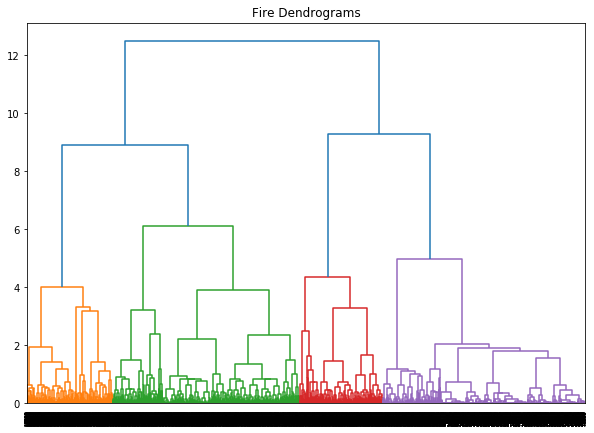

In [33]:
# Will take some time to run

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Fire Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

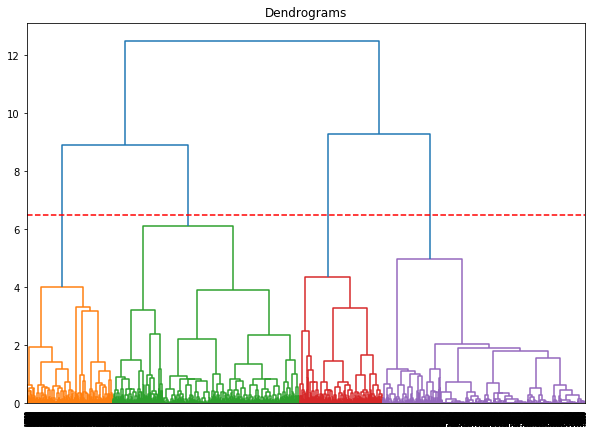

In [62]:
# Using the dendogram above, we can determine K Clusters by drawing a line at the half way point
# of 0 to 13 which is 6.5. Then count the number of lines it intersects to be the K.

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6.5, color='r', linestyle='--')

In [35]:
# the line crosses 4 lines, 2 orange + 2 blue, so K=4 for this data. 

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 1, ..., 0, 1, 2], dtype=int64)

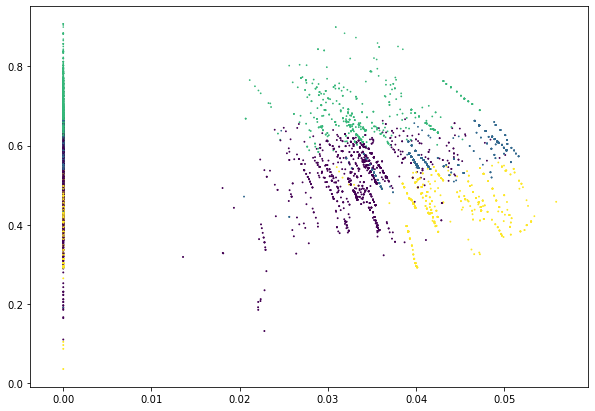

In [36]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Season_Summer'], data_scaled['ELDERPOP_CSD'], data_scaled['LOWEDUC_CSD11'], c=cluster.labels_) 

In [37]:
prediction = cluster.fit_predict(data_scaled)
segmentation['GroupCluster#'] = prediction

In [38]:
segmentation.head()

,ELDERPOP_CSD,YOUNGPOP_CSD,UNEMPLOY_CSD11,LOWEDUC_CSD11,Season_Fall,Season_Spring,Season_Summer,Season_Winter,GroupCluster#
30211,15.1,6.5,7.5,16.000000,1,0,0,0,0
97649,15.7,5.9,7.8,21.184012,0,0,1,0,0
153585,14.8,6.1,9.3,17.508951,0,0,1,0,1
99875,15.4,7.2,4.1,17.860648,0,1,0,0,0
152239,14.8,6.1,9.3,17.508951,0,0,0,1,1


### Now we will export the CSV File to do analysis in Excel to discover what the model Grouped on. 

We should look at the mean for each column like ELDER and Season_fall, etc to see what each of the 4 clusters have in common.


In [39]:
segmentation.to_csv(r'D:\StClair\Capstone\CanadaFireData\Files\GroupedSegmentedFires.csv')

### The next section will look at correlations between the variables

### Here we will count the number of fires, per season, happen in each FSA postal area. That will give us a count of how many total fires occured in that area. The correlation will then show how our variables relate to the amount of fires in that FSA. 

In [190]:
# copy firedata dataframe to a new value called firedata_corr
firedata_corr = firedata

In [191]:

firecount = firedata_corr[['postfsa', 'Season']].value_counts()

In [192]:
firecount = firecount.reset_index()

In [193]:
firecount.columns.values[0] = "FSA"
firecount.columns.values[1] = "Season"
firecount.columns.values[2] = "TotalFires"

In [194]:
# To fix an error in white spaces in columns names.
firecount.columns=firecount.columns.str.strip()



In [195]:
firecount = firecount.sort_values('TotalFires', ascending=False)

In [196]:
firecount.head(10)

# Now we see that PostCode K0K had the highest number of fires, it happened in the springtime, and totalled 770 fires from 2005-2014.

# That area is known as Quinte Shores, East Northumberland County & Prince Edward County, Ontario.
# https://en.wikipedia.org/wiki/Bay_of_Quinte

,FSA,Season,TotalFires
0,K0K,Spring,770
1,P0M,Spring,416
2,K0L,Spring,414
3,K0K,Summer,399
4,N0B,Spring,392
5,K0M,Spring,391
6,K0E,Spring,382
7,N3S,Spring,358
8,L8L,Spring,357
9,K0K,Winter,350


In [73]:
# Start by making a time series chart.
# This will show the total number of fires per FullDate in Ontario.

s = firedata.groupby('FullDate').size()
segmentation = firedata[['FullDate', 'postfsa', 'Season', 'ELDERPOP_CSD', 'YOUNGPOP_CSD', 'PROPOWN', 'MATERGRP', 'UNEMPLOY_CSD11', 'LOWEDUC_CSD11' ]]

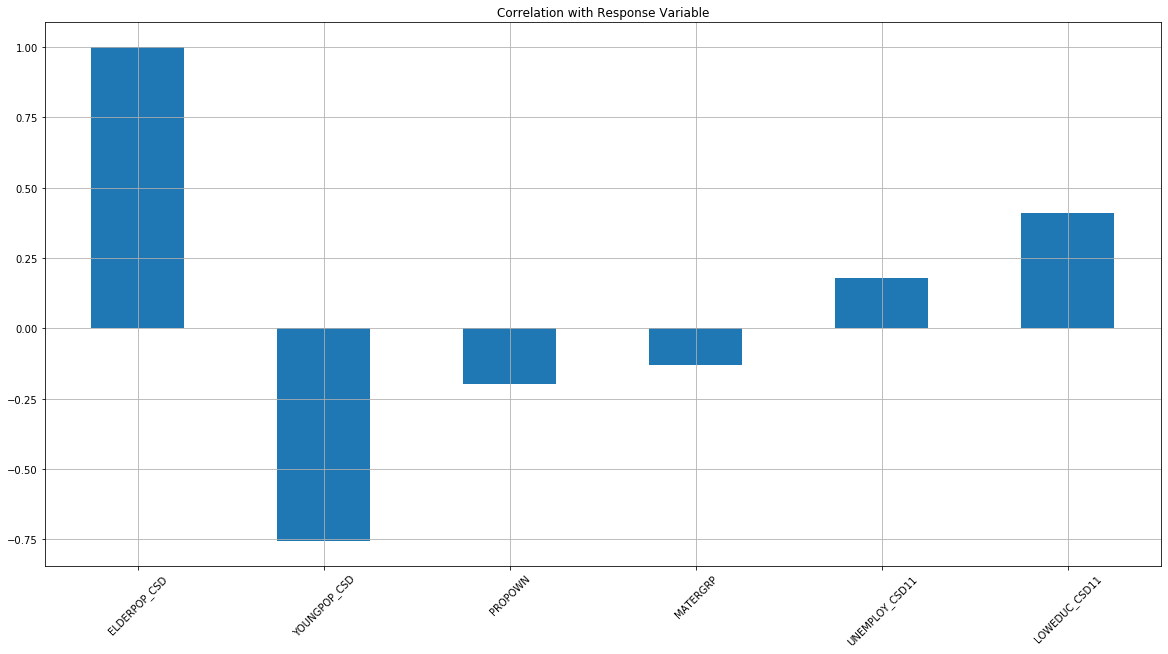

In [71]:
segmentation.corrwith(segmentation.ELDERPOP_CSD).plot.bar(figsize= (20, 10), title='Correlation with Response Variable', fontsize=10, rot=45, grid=True)

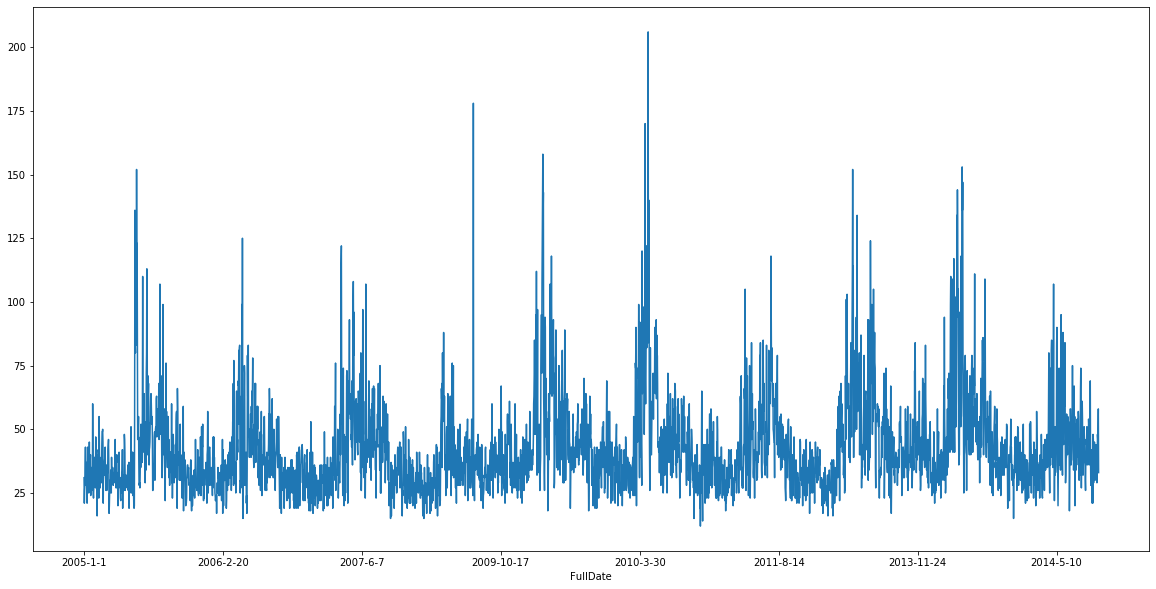

In [50]:
plt.figure(figsize=(20,10))
s.plot()

## Linear Regression

The linear regression model was created to discover a slope and intercept equation that could allow the user to input the season and specific indepdendent variables from future year and predict the number of fires that would occur in that season in Ontario.

As we experimented with calculating this by postal code, the R-squared values were simply too low to be constructive. Thus, it was decided to use the Ontario-wide mean values of the % of Elderly, % of Young People, % of those Unemployed, and the % of those having a lower education from the Statistics Canada Census Data, as well as the feature engineered season, to evaluate the relationships to the calculated total number of fires.

In [197]:
# Start by making a copy of firedata called fire_reg and only keep our desired columns

fire_reg = firedata[['FullDate', 'postfsa', 'Season', 'ELDERPOP_CSD', 'YOUNGPOP_CSD','UNEMPLOY_CSD11', 'LOWEDUC_CSD11' ]]

# Add an empty column to hold the COUNT of fire values we'll in the code below.

fire_reg["TotalFires"] = ""


C:\Users\kenhu\Anaconda3\envs\DAB300F20\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [198]:
fire_reg.head()

,FullDate,postfsa,Season,ELDERPOP_CSD,YOUNGPOP_CSD,UNEMPLOY_CSD11,LOWEDUC_CSD11,TotalFires
19602,2005-1-1,L5J,Winter,9.2,7.3,8.7,15.203448,
19603,2005-1-3,K0C,Winter,12.9,5.9,6.1,22.756757,
19604,2005-1-4,M1W,Winter,13.5,6.4,9.3,17.508951,
19605,2005-1-8,M4J,Winter,13.5,6.4,9.3,17.508951,
19606,2005-2-12,K0L,Winter,17.6,4.8,6.3,15.749129,


In [199]:
# Count the Number of fires per Postal Code

fire_reg = fire_reg.groupby(['Season', 'ELDERPOP_CSD', 'YOUNGPOP_CSD','UNEMPLOY_CSD11', 'LOWEDUC_CSD11'], as_index=False)['TotalFires'].count()



In [200]:
fire_reg.head()

,Season,ELDERPOP_CSD,YOUNGPOP_CSD,UNEMPLOY_CSD11,LOWEDUC_CSD11,TotalFires
0,Fall,2.2,10.6,21.2,55.555556,1
1,Fall,4.8,12.5,9.1,40.170940,3
2,Fall,4.9,12.4,9.1,40.170940,4
3,Fall,5.0,13.1,29.6,64.166667,1
4,Fall,5.2,9.7,10.6,26.229508,1


In [201]:
fire_reg = fire_reg.groupby(['Season'])['TotalFires'].sum().reset_index()

In [202]:
fire_reg['Elderly'] = firedata.ELDERPOP_CSD.mean()
fire_reg['Young'] = firedata.YOUNGPOP_CSD.mean()
fire_reg['Unemployment'] = firedata.UNEMPLOY_CSD11.mean()
fire_reg['LowEducation'] = firedata.LOWEDUC_CSD11.mean()

In [ ]:
# Table is almost ready for Regression, but season is still not numerical.

In [203]:
fire_reg.head()

,Season,TotalFires,Elderly,Young,Unemployment,LowEducation
0,Fall,32618,14.983597,6.27839,8.42646,19.266099
1,Spring,47477,14.983597,6.27839,8.42646,19.266099
2,Summer,42381,14.983597,6.27839,8.42646,19.266099
3,Winter,27821,14.983597,6.27839,8.42646,19.266099


In [204]:
# Now we need to change Season from categorical to numerical so it will work with Linear Regression
# create a list of our conditions
conditions = [
    (fire_reg['Season'] == 'Winter'),
    (fire_reg['Season'] == 'Spring'),
    (fire_reg['Season'] == 'Summer'),
    (fire_reg['Season'] == 'Fall')  
    ]

# create a list of the values we want to assign for each condition
values = [1, 2, 3, 4]

# create a new column and use np.select to assign values to it using our lists as arguments
fire_reg['SeasonNumerical'] = np.select(conditions, values)


In [205]:
fire_reg.drop('Season', axis = 1, inplace=True)

In [206]:
fire_reg.head()

,TotalFires,Elderly,Young,Unemployment,LowEducation,SeasonNumerical
0,32618,14.983597,6.27839,8.42646,19.266099,4
1,47477,14.983597,6.27839,8.42646,19.266099,2
2,42381,14.983597,6.27839,8.42646,19.266099,3
3,27821,14.983597,6.27839,8.42646,19.266099,1


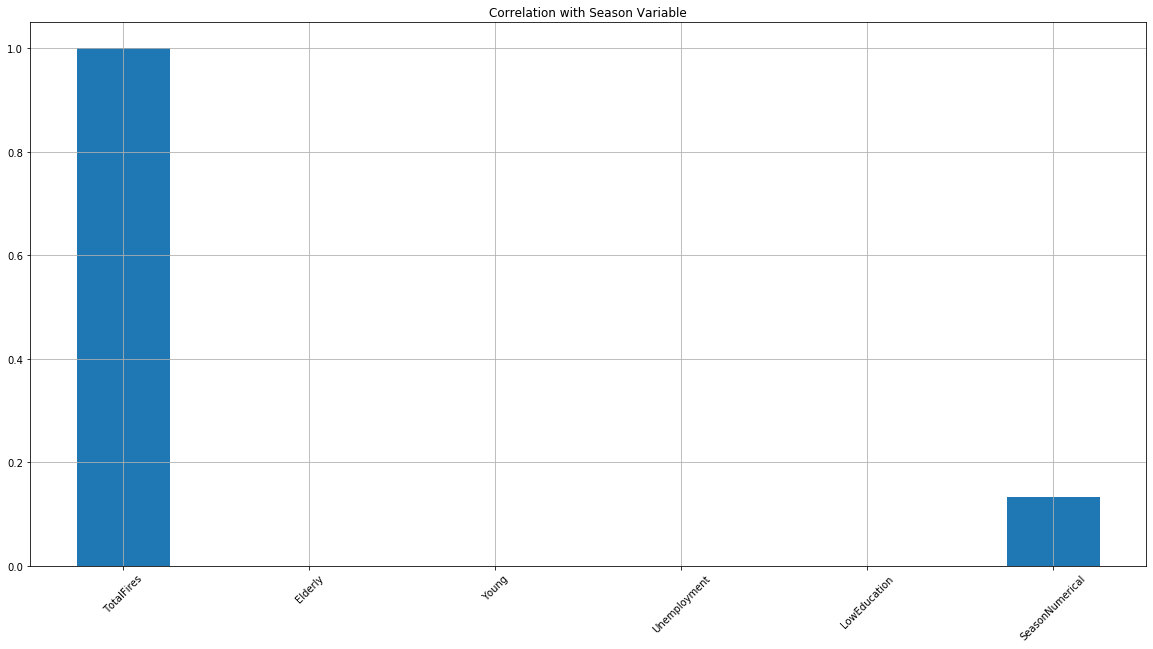

In [207]:
fire_reg.corrwith(fire_reg.TotalFires).plot.bar(figsize= (20, 10), title='Correlation with Season Variable', fontsize=10, rot=45, grid=True)

### This section will create the intercept and slopes for various relationships between the Dependent Variable 'TotalFires' and Independent Variables.

In [208]:
# Start the Regression with sklearn's linear_model

from sklearn import linear_model
import statsmodels.api as sm


In [209]:
fire_reg.columns

Index(['TotalFires', 'Elderly', 'Young', 'Unemployment', 'LowEducation',
       'SeasonNumerical'],
      dtype='object')

In [210]:
X = fire_reg[['Elderly', 'Young', 'Unemployment','LowEducation', 'SeasonNumerical']] 
Y = fire_reg['TotalFires']


regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 35250.5
Coefficients: 
 [  0.    0.    0.    0.  929.5]


### Below we will see that the adjusted R-squared is negative. This tells us that the census info is not relevant and we will focus on the linear regression line of total fires and the season. The census info is not essential because it is a constant value through each season.

The adjusted R-squared is a modified version of R-squared that accounts for predictors that are not significant in a regression model. In other words, the adjusted R-squared shows whether adding additional predictors improve a regression model or not.

In [211]:
# SeasonNumerical vs TotalFires

X = fire_reg[['SeasonNumerical']]
Y = fire_reg['TotalFires']


regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 35250.5
Coefficients: 
 [929.5]
                            OLS Regression Results                            
Dep. Variable:             TotalFires   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.473
Method:                 Least Squares   F-statistic:                   0.03653
Date:                Mon, 05 Apr 2021   Prob (F-statistic):              0.866
Time:                        15:14:12   Log-Likelihood:                -41.466
No. Observations:                   4   AIC:                             86.93
Df Residuals:                       2   BIC:                             85.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

C:\Users\kenhu\Anaconda3\envs\DAB300F20\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


In [212]:
# prediction with sklearn

# In this cell, we can change the parameters of our local area to predict how many fires are expected to occur based
# on the season 

#  ## Only change the variables after the = in this section
Enter_Season = 1

print ('Predicted Number of Fires: \n', regr.predict([[Enter_Season]]))




# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Predicted Number of Fires: 
 [36180.]
                            OLS Regression Results                            
Dep. Variable:             TotalFires   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.473
Method:                 Least Squares   F-statistic:                   0.03653
Date:                Mon, 05 Apr 2021   Prob (F-statistic):              0.866
Time:                        15:14:17   Log-Likelihood:                -41.466
No. Observations:                   4   AIC:                             86.93
Df Residuals:                       2   BIC:                             85.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
cons

C:\Users\kenhu\Anaconda3\envs\DAB300F20\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


In [213]:
# Start the User Interface
import tkinter as tk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [214]:
# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 600, height = 500)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, anchor='w')
canvas1.create_window(260, 240, window=label_Coefficients)

# New_Season label and input box
label1 = tk.Label(root, text='Enter Season #: ', justify='left')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)



def values(): 
    global Enter_Season #our Season Input Variable
    Enter_Season = float(entry1.get()) 
    
    
    Prediction_result  = ('Predicted # of Fires: ', regr.predict([[Enter_Season]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(270, 440, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Seasonal Fires',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 415, window=button1)
 


root.mainloop()